Symmetry using Mantid
=======

In [42]:
# Import mantid
import sys
sys.path.append("/opt/mantidnightly/bin")
import numpy as np
from mantid.simpleapi import *
from mantid.geometry import SymmetryOperationFactory, SpaceGroupFactory

import matplotlib.pyplot as plt
%matplotlib inline

Space-group and symmetry operations in Mantid
-----------
Mantid has a `SpaceGroupFactory` and `SymmetryOperationFactory`, which can be imported by `from mantid.geometry import SymmetryOperationFactory, SpaceGroupFactory`.

You can either get the symmetry operations from a space group or list them all manually.

### Defining a space group
e.g. To get space group 3 (P2):

In [2]:
sg = SpaceGroupFactory.createSpaceGroup("P 1 1 2")

You can find a complete list of the space groups in Mantid [here](https://github.com/mantidproject/mantid/blob/master/Framework/Geometry/src/Crystal/SpaceGroupFactory.cpp#L454-L995).

Then to get all the symmetry operations from that space group

In [23]:
symOps = sg.getSymmetryOperations()
print symOps

[[-x,-y,z],[x,y,z]]


### Manually listing symmetries
Alternatively you can list all the symmetry operations individually

In [26]:
symOps = SymmetryOperationFactory.createSymOps("x,y,z; -y,x-y,z+1/3; -x+y,-x,z; y,x,-z; x-y,-y,-z; -x,-x+y,-z")
for sym in symOps:
    print sym.getIdentifier()

x,y,z
-y,x-y,z+1/3
-x+y,-x,z
y,x,-z
x-y,-y,-z
-x,-x+y,-z


### Modifying UB matrix

Get the current UB of the workspace

In [27]:
ws=CreateSingleValuedWorkspace()
LoadIsawUB(ws,"benzil_Hexagonal.mat")
ub = ws.sample().getOrientedLattice().getUB()
print ub

[[ 0.00515547 -0.11650896 -0.00113575]
 [ 0.00488067  0.00430823 -0.07435272]
 [ 0.13767679  0.07331694  0.00261847]]


To calculate the symmetry transformation matrix:

In [31]:
for sym in symOps:
    UBtrans = np.zeros((3,3))
    UBtrans[0] = sym.transformHKL([1,0,0])
    UBtrans[1] = sym.transformHKL([0,1,0])
    UBtrans[2] = sym.transformHKL([0,0,1])
    UBtrans = np.matrix(UBtrans.T)

To calculate the new UB using the tranformation matrix

In [32]:
new_ub = ub * UBtrans

You can then set the UB of a workspace by

In [33]:
#SetUB(ws, UB=ub)

This create a list of UB's that can be looped over.

In [34]:
ub_list=[]
for sym in symOps:
    UBtrans = np.zeros((3,3))
    UBtrans[0] = sym.transformHKL([1,0,0])
    UBtrans[1] = sym.transformHKL([0,1,0])
    UBtrans[2] = sym.transformHKL([0,0,1])
    UBtrans = np.matrix(UBtrans.T)
    new_ub = ub*UBtrans
    print "Symmetry transform for "+sym.getIdentifier()
    print UBtrans
    print "New UB:"
    print new_ub
    ub_list.append(new_ub)

Symmetry transform for x,y,z
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]
New UB:
[[ 0.00515547 -0.11650896 -0.00113575]
 [ 0.00488067  0.00430823 -0.07435272]
 [ 0.13767679  0.07331694  0.00261847]]
Symmetry transform for -y,x-y,z+1/3
[[-1. -1.  0.]
 [ 1.  0.  0.]
 [ 0.  0.  1.]]
New UB:
[[-0.12166443 -0.00515547 -0.00113575]
 [-0.00057244 -0.00488067 -0.07435272]
 [-0.06435985 -0.13767679  0.00261847]]
Symmetry transform for -x+y,-x,z
[[ 0.  1.  0.]
 [-1. -1.  0.]
 [ 0.  0.  1.]]
New UB:
[[ 0.11650896  0.12166443 -0.00113575]
 [-0.00430823  0.00057244 -0.07435272]
 [-0.07331694  0.06435985  0.00261847]]
Symmetry transform for y,x,-z
[[ 0.  1.  0.]
 [ 1.  0.  0.]
 [ 0.  0. -1.]]
New UB:
[[-0.11650896  0.00515547  0.00113575]
 [ 0.00430823  0.00488067  0.07435272]
 [ 0.07331694  0.13767679 -0.00261847]]
Symmetry transform for x-y,-y,-z
[[ 1.  0.  0.]
 [-1. -1.  0.]
 [ 0.  0. -1.]]
New UB:
[[ 0.12166443  0.11650896  0.00113575]
 [ 0.00057244 -0.00430823  0.07435272]
 [ 0.06435985 -0.07

Complete Example - Benzil - Space Group 152 (P-3m1)
-------

In [38]:
# Load in solid angle and flux from Vanadium
LoadNexus(Filename='/SNS/CORELLI/shared/Vanadium/2016B/SolidAngle20160720NoCC.nxs', OutputWorkspace='sa')
LoadNexus(Filename='/SNS/CORELLI/shared/Vanadium/2016B/Spectrum20160720NoCC.nxs', OutputWorkspace='flux')

Workspace2D
Title: Vanadium phi5mmx8mm Rod, CCR Stick A, T=200K
Histograms: 1
Bins: 1000
Data points
X axis: Momentum / Angstrom^-1
Y axis: Counts
Distribution: False
Instrument: CORELLI (2014-Feb-25 to 2100-Jan-31)Instrument from: /SNS/CORELLI/IPTS-15526/nexus/CORELLI_29782.nxs.h5

Run start: 2016-Jul-19 21:12:45
Run end:  2016-Jul-20 00:40:39

In [39]:
# Calculate new UB matrixes to use
ws=CreateSingleValuedWorkspace()
LoadIsawUB(ws,"/SNS/users/rwp/benzil/benzil_Hexagonal.mat")
ub=ws.sample().getOrientedLattice().getUB()

sg=SpaceGroupFactory.createSpaceGroup("P 31 2 1")
symOps = sg.getSymmetryOperations()
    
for sym in symOps:
    symTrans = np.array([sym.transformHKL([1,0,0]),
                         sym.transformHKL([0,1,0]),
                         sym.transformHKL([0,0,1])])
    symTrans=np.matrix(symTrans.T)
    newUB = ub*symTrans

In [41]:
# Loop over runs list
runs=range(29782,29818)
runs=[29782]
for r in runs:
    filename='/SNS/CORELLI/IPTS-15526/nexus/CORELLI_'+str(r)+'.nxs.h5'
    print 'Loading run number:'+ str(r)
    data=LoadEventNexus(Filename=filename)
    SetGoniometer(data,Axis0="BL9:Mot:Sample:Axis1,0,1,0,1")
    for ub in ub_list:
        print "using UB:"
        print ub
        SetUB(data, UB=ub)
        md=ConvertToMD(InputWorkspace=data,QDimensions='Q3D',dEAnalysisMode='Elastic', Q3DFrames='HKL',
                       QConversionScales='HKL',LorentzCorrection='0',
                       Uproj='1,1,0',Vproj='1,-1,0',Wproj='0,0,1',
                       MinValues='-10.1,-17.6,-5.1',MaxValues='10.1,17.6,5.1')
        a1,b1=MDNormSCD(InputWorkspace='md',FluxWorkspace='flux',SolidAngleWorkspace='sa',
                        AlignedDim0="[H,H,0],-10.1,10.1,401",
                        AlignedDim1="[H,-H,0],-10.0,10.,401",
                        AlignedDim2="[0,0,L],-5.1,5.1,51")
        if mtd.doesExist('dataMD'):
            dataMD=dataMD+a1
        else:
            dataMD=CloneMDWorkspace(a1)
        if mtd.doesExist('normMD'):
            normMD=normMD+b1
        else:
            normMD=CloneMDWorkspace(b1)

Loading run number:29782
using UB:
[[ 0.00515547 -0.11650896 -0.00113575]
 [ 0.00488067  0.00430823 -0.07435272]
 [ 0.13767679  0.07331694  0.00261847]]
using UB:
[[-0.12166443 -0.00515547 -0.00113575]
 [-0.00057244 -0.00488067 -0.07435272]
 [-0.06435985 -0.13767679  0.00261847]]
using UB:
[[ 0.11650896  0.12166443 -0.00113575]
 [-0.00430823  0.00057244 -0.07435272]
 [-0.07331694  0.06435985  0.00261847]]
using UB:
[[-0.11650896  0.00515547  0.00113575]
 [ 0.00430823  0.00488067  0.07435272]
 [ 0.07331694  0.13767679 -0.00261847]]
using UB:
[[ 0.12166443  0.11650896  0.00113575]
 [ 0.00057244 -0.00430823  0.07435272]
 [ 0.06435985 -0.07331694 -0.00261847]]
using UB:
[[-0.00515547 -0.12166443  0.00113575]
 [-0.00488067 -0.00057244  0.07435272]
 [-0.13767679 -0.06435985 -0.00261847]]


In [43]:
# Calculate normalized data
normData=dataMD/normMD

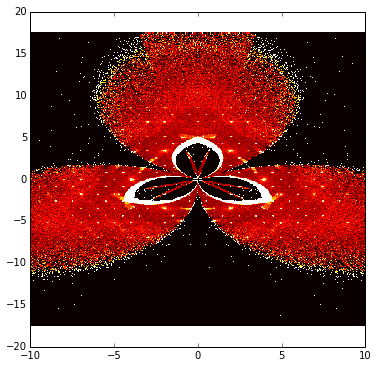

In [57]:
# Plot the results
x = np.linspace(-10,10,401)
y = np.linspace(-17.5,17.5,401)
X, Y = np.meshgrid(x, y)
fig = plt.figure(figsize=(6,6))
plt.pcolormesh(X, Y,normData.getSignalArray()[:,:,25],vmin=0,vmax=0.00002,cmap='hot')